In [ ]:
pip install psycopg2
pip install dask
pip install dask-ml
pip install pandas
pip install scikit-learn
pip install scipy

In [15]:
pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install optuna


In [ ]:
pip install matplotlib seaborn


In [1]:
import psycopg2
from psycopg2 import OperationalError

# ข้อมูลการเชื่อมต่อ
pg_host = "localhost"
pg_database = "Data_Rubber"
pg_user = "postgres"
pg_password = "141245"

# ฟังก์ชันเพื่อเชื่อมต่อและตรวจสอบการเชื่อมต่อกับ PostgreSQL
def connect_to_postgres():
    try:
        connection_pg = psycopg2.connect(
            host=pg_host,
            database=pg_database,
            user=pg_user,
            password=pg_password
        )
        print("เชื่อมต่อฐานข้อมูลสำเร็จ")
        return connection_pg
    except OperationalError as e:
        print(f"ไม่สามารถเชื่อมต่อฐานข้อมูลได้: {e}")
        return None

# เรียกใช้ฟังก์ชันเชื่อมต่อ
connection = connect_to_postgres()

เชื่อมต่อฐานข้อมูลสำเร็จ


In [5]:
import os
# จำนวนคอร์ CPU (logical cores)
print("Logical cores:", os.cpu_count())


Logical cores: 8


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression  # ตัวอย่างโมเดล
from sklearn.metrics import mean_squared_error  # สำหรับการประเมินผล

# ดึงข้อมูลจาก PostgreSQL
query = "SELECT province, district, subdistrict, dryrubbercontent, rubberarea, rubbertreecount, rubbertreeage, rubbertype, code_subdistrict, rainfall, avg_temperature, rainy_days, avg_humidity FROM rubberfarm2"
df = pd.read_sql_query(query, connection)

C:\Users\Toon\AppData\Local\Temp\ipykernel_13032\2878874383.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


In [3]:
import pandas as pd

# กำหนด paths ของไฟล์ Excel
file_path1 = r'D:\DataSet_Project\ดิน\Soil_Statistics\ใต้กลาง\All_Soil_ใต้กลาง.xlsx'
file_path2 = r'D:\DataSet_Project\ดิน\Soil_Statistics\ใต้รวมใหม่\Soil_Statistics_รวม.xlsx'

# อ่านข้อมูลจากไฟล์ทั้งสอง
df_soil1 = pd.read_excel(file_path1)
df_soil2 = pd.read_excel(file_path2)

# รวมข้อมูลทั้งสอง DataFrame
df_combined = pd.concat([df_soil1, df_soil2], ignore_index=True)

# ลบคอลัมน์ Source_File
if 'Source_File' in df_combined.columns:
    df_combined = df_combined.drop(columns=['Source_File'])



In [4]:
import pandas as pd

# รวม df และ df_soil โดยใช้คอลัมน์รหัสตำบลเป็นตัวเชื่อม
merged_df = pd.merge(df, df_combined, how='left', left_on='code_subdistrict', right_on='TB_IDN')

# ดูข้อมูลหลังจากรวมแล้ว
merged_df.head()

,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,code_subdistrict,rainfall,avg_temperature,rainy_days,avg_humidity,TB_IDN,fer_top,soilgroup,pH_top,pH_low
0,นราธิวาส,สุคิริน,มาโมง,2700.0,16.0,960,24,RRIM 600,960901,3480.0,27.81,170,78.91,960901.0,L,53/26,5.0-5.5,4.5-5.5
1,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,940201,2534.5,27.85,158,80.08,940201.0,L,39,4.5-5.5,4.5-5.5
2,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,940201,2534.5,27.85,158,80.08,940201.0,M,32,4.5-6.0,4.5-6.0
3,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,940201,2534.5,27.85,158,80.08,940201.0,L,39,4.5-5.5,4.5-5.5
4,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,940201,2534.5,27.85,158,80.08,940201.0,M,32,4.5-6.0,4.5-6.0


In [5]:
# ลบคอลัมน์ที่ต้องการ โดยระบุชื่อคอลัมน์ เช่น 'ชื่อคอลัมน์'
merged_df.drop(columns=['code_subdistrict','TB_IDN'], inplace=True)
# ลบแถวที่มีค่าคอลัมน์ว่างทั้งหมด (ค่าว่างทุกคอลัมน์)
merged_df.dropna(how='any', inplace=True)
merged_df = merged_df[merged_df['rubberarea'] != 0]

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242306 entries, 0 to 1251604
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   province          1242306 non-null  object 
 1   district          1242306 non-null  object 
 2   subdistrict       1242306 non-null  object 
 3   dryrubbercontent  1242306 non-null  float64
 4   rubberarea        1242306 non-null  float64
 5   rubbertreecount   1242306 non-null  int64  
 6   rubbertreeage     1242306 non-null  int64  
 7   rubbertype        1242306 non-null  object 
 8   rainfall          1242306 non-null  float64
 9   avg_temperature   1242306 non-null  float64
 10  rainy_days        1242306 non-null  int64  
 11  avg_humidity      1242306 non-null  float64
 12  fer_top           1242306 non-null  object 
 13  soilgroup         1242306 non-null  object 
 14  pH_top            1242306 non-null  object 
 15  pH_low            1242306 non-null  object 
dtypes: fl

In [7]:
from sklearn.ensemble import IsolationForest
from scipy import stats

# 1. สร้างฟีเจอร์ใหม่
merged_df['production_per_tree'] = merged_df['dryrubbercontent'] / merged_df['rubbertreecount']
merged_df['production_per_area'] = merged_df['dryrubbercontent'] / merged_df['rubberarea']

# ใช้ log transformation
merged_df['log_rubbertreecount'] = np.log1p(merged_df['rubbertreecount'])
merged_df['log_rubberarea'] = np.log1p(merged_df['rubberarea'])
merged_df['log_dryrubbercontent'] = np.log1p(merged_df['dryrubbercontent'])


# 3. ใช้ z-score เพื่อตรวจจับค่าผิดปกติทางสถิติ
merged_df['zscore_rubbertreecount'] = stats.zscore(merged_df['log_rubbertreecount'])
merged_df['zscore_rubberarea'] = stats.zscore(merged_df['log_rubberarea'])
merged_df['zscore_dryrubber'] = stats.zscore(merged_df['log_dryrubbercontent'])
merged_df['zscore_production_per_tree'] = stats.zscore(merged_df['production_per_tree'])
merged_df['zscore_production_per_area'] = stats.zscore(merged_df['production_per_area'])

# 4. กรองข้อมูลที่ z-score มากกว่า 3
merged_df_cleaned = merged_df[
    (merged_df['zscore_dryrubber'].abs() < 3) & 
    (merged_df['zscore_rubbertreecount'].abs() < 3) &
    (merged_df['zscore_rubberarea'].abs() < 3) &
    (merged_df['zscore_production_per_tree'].abs() < 3) & 
    (merged_df['zscore_production_per_area'].abs() < 3)
]

# 5. ใช้ Isolation Forest เพื่อคัดกรองค่าผิดปกติที่ซับซ้อนกว่า
iso_forest = IsolationForest(contamination=0.10)
merged_df_cleaned['anomaly'] = iso_forest.fit_predict(merged_df_cleaned[['rubbertreecount', 'rubberarea', 'production_per_tree', 'production_per_area']])
merged_df_cleaned = merged_df_cleaned[merged_df_cleaned['anomaly'] == 1]


C:\Users\Toon\AppData\Local\Temp\ipykernel_13032\939654368.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_cleaned['anomaly'] = iso_forest.fit_predict(merged_df_cleaned[['rubbertreecount', 'rubberarea', 'production_per_tree', 'production_per_area']])


In [8]:
merged_df_cleaned

,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,rainfall,avg_temperature,...,production_per_area,log_rubbertreecount,log_rubberarea,log_dryrubbercontent,zscore_rubbertreecount,zscore_rubberarea,zscore_dryrubber,zscore_production_per_tree,zscore_production_per_area,anomaly
0,นราธิวาส,สุคิริน,มาโมง,2700.0,16.0,960,24,RRIM 600,3480.0,27.81,...,168.75,6.867974,2.833213,7.901377,1.008415,1.268181,0.708260,-0.015629,-0.025557,1
1,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,...,300.00,4.394449,0.693147,5.707110,-2.142099,-1.975968,-1.848349,-0.001964,0.006792,1
2,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,...,300.00,4.394449,0.693147,5.707110,-2.142099,-1.975968,-1.848349,-0.001964,0.006792,1
3,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,...,264.00,5.993961,1.791759,7.186144,-0.104810,-0.310570,-0.125080,-0.008523,-0.002081,1
4,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,...,264.00,5.993961,1.791759,7.186144,-0.104810,-0.310570,-0.125080,-0.008523,-0.002081,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251600,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1872.0,8.0,540,31,RRIM 600,2750.0,27.85,...,234.00,6.293419,2.197225,7.535297,0.276608,0.304079,0.281728,-0.006093,-0.009475,1
1251601,นครศรีธรรมราช,เชียรใหญ่,แม่เจ้าอยู่หัว,1170.0,5.0,400,19,RRIM 600,2750.0,27.85,...,234.00,5.993961,1.791759,7.065613,-0.104810,-0.310570,-0.265515,-0.013989,-0.009475,1
1251602,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1521.0,6.0,450,31,RRIM 600,2750.0,27.85,...,253.50,6.111467,1.945910,7.327781,0.044857,-0.076891,0.039945,-0.007357,-0.004669,1
1251603,นครศรีธรรมราช,นบพิตำ,กรุงชิง,4680.0,20.0,1600,19,RRIM 600,2750.0,27.85,...,234.00,7.378384,3.044522,8.451267,1.658520,1.588507,1.348954,-0.013989,-0.009475,1


In [9]:
columns_to_drop = [
    'production_per_tree', 'production_per_area', 'log_rubbertreecount',
    'log_rubberarea', 'log_dryrubbercontent', 'zscore_rubbertreecount',
    'zscore_rubberarea', 'zscore_dryrubber', 'zscore_production_per_tree',
    'zscore_production_per_area', 'anomaly'
]

merged_df_cleaned = merged_df_cleaned.drop(columns=columns_to_drop)


In [10]:
merged_df_cleaned

,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,rainfall,avg_temperature,rainy_days,avg_humidity,fer_top,soilgroup,pH_top,pH_low
0,นราธิวาส,สุคิริน,มาโมง,2700.0,16.0,960,24,RRIM 600,3480.0,27.81,170,78.91,L,53/26,5.0-5.5,4.5-5.5
1,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,158,80.08,L,39,4.5-5.5,4.5-5.5
2,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,158,80.08,M,32,4.5-6.0,4.5-6.0
3,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,158,80.08,L,39,4.5-5.5,4.5-5.5
4,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,158,80.08,M,32,4.5-6.0,4.5-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251600,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1872.0,8.0,540,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5
1251601,นครศรีธรรมราช,เชียรใหญ่,แม่เจ้าอยู่หัว,1170.0,5.0,400,19,RRIM 600,2750.0,27.85,178,82.50,M,10,4.5-5.0,4.5-7.0
1251602,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1521.0,6.0,450,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5
1251603,นครศรีธรรมราช,นบพิตำ,กรุงชิง,4680.0,20.0,1600,19,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5


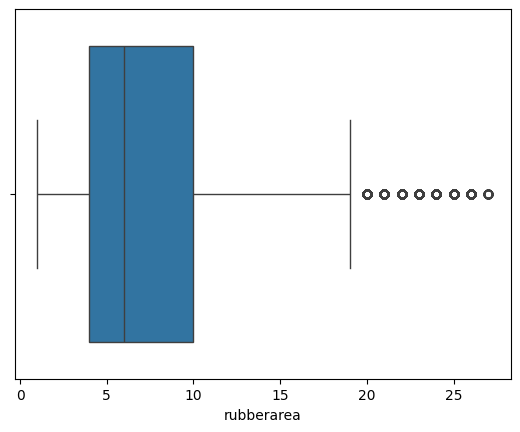

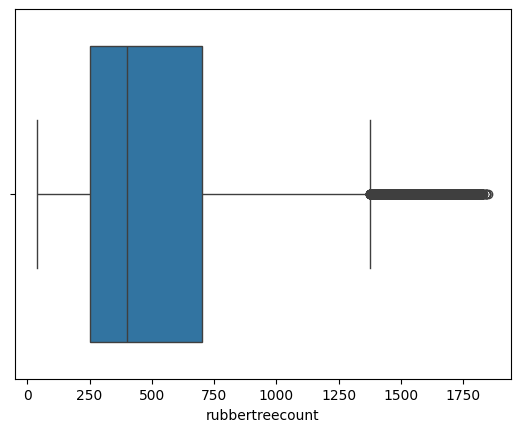

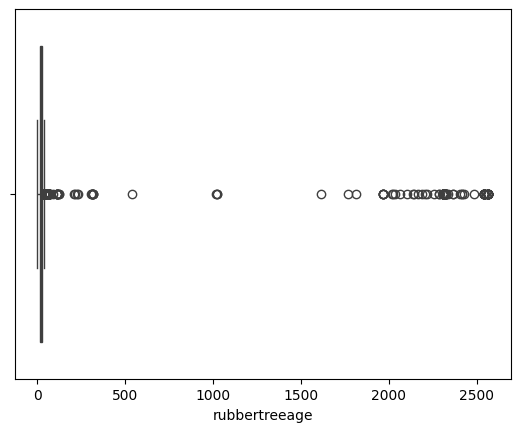

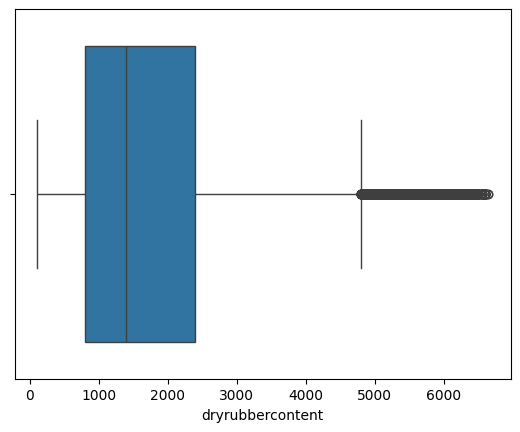

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
sns.boxplot(x=merged_df_cleaned['rubberarea'])
plt.show()
sns.boxplot(x=merged_df_cleaned['rubbertreecount'])
plt.show()
sns.boxplot(x=merged_df_cleaned['rubbertreeage'])
plt.show()
sns.boxplot(x=merged_df_cleaned['dryrubbercontent'])
plt.show()




ข้อมูลหลังลบ outliers:
       dryrubbercontent    rubberarea  rubbertreecount  rubbertreeage  \
count      1.040666e+06  1.040666e+06     1.040666e+06   1.040666e+06   
mean       1.545892e+03  6.411240e+00     4.577892e+02   2.022368e+01   
std        9.574930e+02  3.882735e+00     2.745242e+02   6.703619e+00   
min        1.120000e+02  1.000000e+00     4.100000e+01   3.000000e+00   
25%        8.000000e+02  3.000000e+00     2.500000e+02   1.600000e+01   
50%        1.300000e+03  5.000000e+00     4.000000e+02   1.900000e+01   
75%        2.100000e+03  9.000000e+00     6.200000e+02   2.500000e+01   
max        4.335000e+03  2.400000e+01     1.375000e+03   3.800000e+01   

           rainfall  avg_temperature    rainy_days  avg_humidity  
count  1.040666e+06     1.040666e+06  1.040666e+06  1.040666e+06  
mean   2.453861e+03     2.811876e+01  1.725819e+02  8.074067e+01  
std    6.478596e+02     4.242370e-01  1.298598e+01  2.309655e+00  
min    6.027000e+02     2.751000e+01  9.400000e+01 

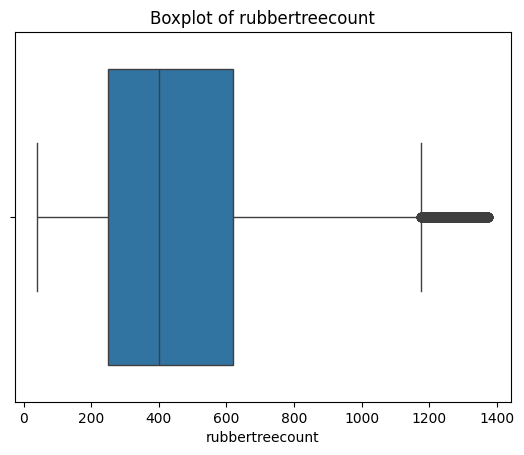

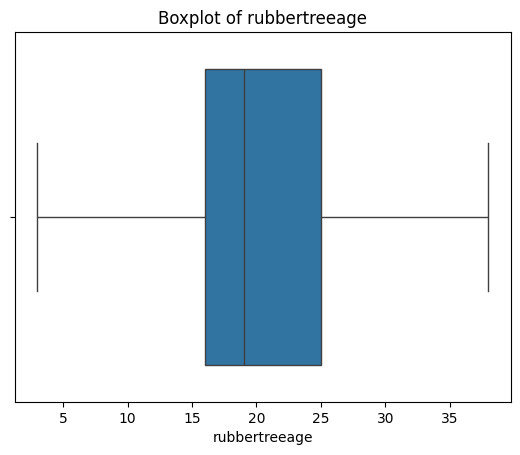

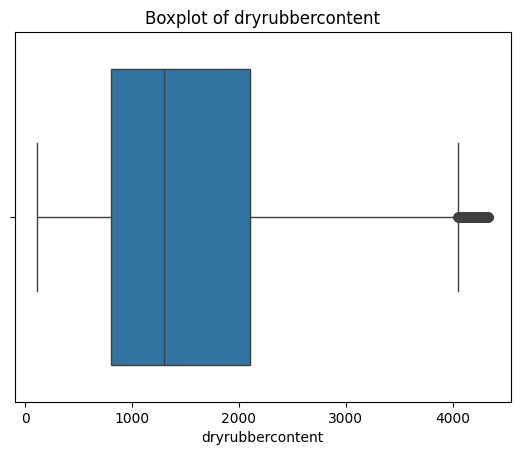

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List ของคอลัมน์ที่ต้องการจัดการ outliers
columns_to_clean = ['rubbertreecount', 'rubbertreeage', 'dryrubbercontent']

# Copy dataframe เพื่อเก็บผลลัพธ์
cleaned_data = merged_df_cleaned.copy()

# ลบ outliers สำหรับแต่ละคอลัมน์
for col in columns_to_clean:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # กรองข้อมูล
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

# ตรวจสอบข้อมูลหลังลบ outliers
print("ข้อมูลหลังลบ outliers:")
print(cleaned_data.describe())

# สร้าง Boxplot สำหรับแต่ละคอลัมน์
for col in columns_to_clean:
    sns.boxplot(x=cleaned_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [134]:
cleaned_data

,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,rainfall,avg_temperature,rainy_days,avg_humidity,fer_top,soilgroup,pH_top,pH_low
0,นราธิวาส,สุคิริน,มาโมง,2700.0,16.0,960,24,RRIM 600,3480.0,27.81,170,78.91,L,53/26,5.0-5.5,4.5-5.5
1,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,158,80.08,L,39,4.5-5.5,4.5-5.5
2,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,158,80.08,M,32,4.5-6.0,4.5-6.0
3,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,158,80.08,L,39,4.5-5.5,4.5-5.5
4,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,158,80.08,M,32,4.5-6.0,4.5-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251599,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1404.0,6.0,420,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5
1251600,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1872.0,8.0,540,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5
1251601,นครศรีธรรมราช,เชียรใหญ่,แม่เจ้าอยู่หัว,1170.0,5.0,400,19,RRIM 600,2750.0,27.85,178,82.50,M,10,4.5-5.0,4.5-7.0
1251602,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1521.0,6.0,450,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5


In [135]:
unique_subdistricts = cleaned_data['subdistrict'].unique()
num_unique_subdistricts = len(unique_subdistricts)
print(f'Number of unique subdistricts: {num_unique_subdistricts}')

Number of unique subdistricts: 963


In [139]:
from sklearn.preprocessing import LabelEncoder

# สร้าง LabelEncoder
le = LabelEncoder()

# ตัวอย่างข้อมูล
rubbertype_series = cleaned_data['rubbertype']

value_counts = pd.Series(rubbertype_series).value_counts()
value_counts



rubbertype
RRIM 600    973294
RRIT 251     44311
BPM 24       12666
PB 235        8984
PB 260        1137
PR 255         250
RRIT 226        10
RRIC 100         8
PB 5/51          6
Name: count, dtype: int64

In [142]:
# แทนค่าที่ไม่บ่อยให้เป็น 'Others' โดยใช้ list comprehension

threshold = 2000
cleaned_data['rubbertype'] = cleaned_data['rubbertype'].apply(
    lambda x: x if value_counts[x] >= threshold else 'Others'
)



In [143]:
import pandas as pd

# สมมติว่า cleaned_data คือ DataFrame ที่คุณมี
# cleaned_data = pd.read_csv("path_to_your_file.csv")  # อ่านไฟล์ของคุณ (ถ้าจำเป็น)

# นับจำนวนแต่ละค่าในคอลัมน์ rubbertype
rubbertype_counts = cleaned_data['rubbertype'].value_counts()

# แสดงผล
print(rubbertype_counts)


rubbertype
RRIM 600    973294
RRIT 251     44311
BPM 24       12666
PB 235        8984
Others        1411
Name: count, dtype: int64


In [144]:
cleaned_data

,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,rainfall,avg_temperature,rainy_days,avg_humidity,fer_top,soilgroup,pH_top,pH_low
0,นราธิวาส,สุคิริน,มาโมง,2700.0,16.0,960,24,RRIM 600,3480.0,27.81,170,78.91,L,53/26,5.0-5.5,4.5-5.5
1,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,158,80.08,L,39,4.5-5.5,4.5-5.5
2,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,158,80.08,M,32,4.5-6.0,4.5-6.0
3,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,158,80.08,L,39,4.5-5.5,4.5-5.5
4,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,158,80.08,M,32,4.5-6.0,4.5-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251599,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1404.0,6.0,420,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5
1251600,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1872.0,8.0,540,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5
1251601,นครศรีธรรมราช,เชียรใหญ่,แม่เจ้าอยู่หัว,1170.0,5.0,400,19,RRIM 600,2750.0,27.85,178,82.50,M,10,4.5-5.0,4.5-7.0
1251602,นครศรีธรรมราช,นบพิตำ,กรุงชิง,1521.0,6.0,450,31,RRIM 600,2750.0,27.85,178,82.50,L,51,4.5-5.0,4.5-5.5


## เริ่มต้นแปลง Encoder 

In [145]:
from sklearn.preprocessing import LabelEncoder

# แปลงจังหวัด, อำเภอ, ตำบล เป็นตัวเลข
province_encoder = LabelEncoder()
district_encoder = LabelEncoder()
subdistrict_encoder = LabelEncoder()
rubbertype_encoder = LabelEncoder()
fer_top_encoder = LabelEncoder()
soilgroup_encoder = LabelEncoder()
pH_top_encoder = LabelEncoder()
pH_low_encoder = LabelEncoder()

cleaned_data["province_encoded"] = province_encoder.fit_transform(cleaned_data["province"])
cleaned_data["district_encoded"] = district_encoder.fit_transform(cleaned_data["district"])
cleaned_data["subdistrict_encoded"] = subdistrict_encoder.fit_transform(cleaned_data["subdistrict"])
cleaned_data["rubbertype_encoded"] = rubbertype_encoder.fit_transform(cleaned_data["rubbertype"])
cleaned_data["fer_top_encoded"] = fer_top_encoder.fit_transform(cleaned_data["fer_top"])
cleaned_data["soilgroup_encoded"] = soilgroup_encoder.fit_transform(cleaned_data["soilgroup"])
cleaned_data["pH_top_encoded"] = pH_top_encoder.fit_transform(cleaned_data["pH_top"])
cleaned_data["pH_low_encoded"] = pH_low_encoder.fit_transform(cleaned_data["pH_low"])


In [146]:
X_categorical = cleaned_data[["province_encoded", "district_encoded", "subdistrict_encoded","rubbertype_encoded","fer_top_encoded","soilgroup_encoded","pH_top_encoded","pH_low_encoded"]]
X_numeric = cleaned_data[["rubberarea", "rubbertreecount","rubbertreeage","rainfall","avg_temperature","rainy_days","avg_humidity"]]
y = cleaned_data["dryrubbercontent"]

In [169]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Dropout, BatchNormalization

# กำหนดขนาดหมวดหมู่
n_provinces = len(province_encoder.classes_)
n_districts = len(district_encoder.classes_)
n_subdistricts = len(subdistrict_encoder.classes_)
n_rubbertypes = len(rubbertype_encoder.classes_)
n_fer_top = len(fer_top_encoder.classes_)  # สำหรับ fer_top_encoded
n_soilgroup = len(soilgroup_encoder.classes_)  # สำหรับ soilgroup_encoded
n_pH_top = len(pH_top_encoder.classes_)  # สำหรับ pH_top_encoded
n_pH_low = len(pH_low_encoder.classes_)  # สำหรับ pH_low_encoded


# 1. Inputs
province_input = Input(shape=(1,), name="province_input")
district_input = Input(shape=(1,), name="district_input")
subdistrict_input = Input(shape=(1,), name="subdistrict_input")
rubbertype_input = Input(shape=(1,), name="rubbertype_input")
fer_top_input = Input(shape=(1,), name="fer_top_input")
soilgroup_input = Input(shape=(1,), name="soilgroup_input")
pH_top_input = Input(shape=(1,), name="pH_top_input")
pH_low_input = Input(shape=(1,), name="pH_low_input")
numeric_input = Input(shape=(X_numeric.shape[1],), name="numeric_input")

# ขนาดเวกเตอร์ใน Embedding Layer
embedding_dim = 32

# 2. Embedding Layers
province_embedding = Embedding(input_dim=n_provinces, output_dim=embedding_dim, name="province_embedding")(province_input)
district_embedding = Embedding(input_dim=n_districts, output_dim=embedding_dim, name="district_embedding")(district_input)
subdistrict_embedding = Embedding(input_dim=n_subdistricts, output_dim=embedding_dim, name="subdistrict_embedding")(subdistrict_input)
rubbertype_embedding = Embedding(input_dim=n_rubbertypes, output_dim=embedding_dim, name="rubbertype_embedding")(rubbertype_input)
fer_top_embedding = Embedding(input_dim=n_fer_top, output_dim=embedding_dim, name="fer_top_embedding")(fer_top_input)
soilgroup_embedding = Embedding(input_dim=n_soilgroup, output_dim=embedding_dim, name="soilgroup_embedding")(soilgroup_input)
pH_top_embedding = Embedding(input_dim=n_pH_top, output_dim=embedding_dim, name="pH_top_embedding")(pH_top_input)
pH_low_embedding = Embedding(input_dim=n_pH_low, output_dim=embedding_dim, name="pH_low_embedding")(pH_low_input)


# 3. Flatten Embeddings
province_flatten = Flatten()(province_embedding)
district_flatten = Flatten()(district_embedding)
subdistrict_flatten = Flatten()(subdistrict_embedding)
rubbertype_flatten = Flatten()(rubbertype_embedding)
fer_top_flatten = Flatten()(fer_top_embedding)
soilgroup_flatten = Flatten()(soilgroup_embedding)
pH_top_flatten = Flatten()(pH_top_embedding)
pH_low_flatten = Flatten()(pH_low_embedding)

# 4. Concatenate All Features
concatenated = Concatenate()([
    province_flatten, district_flatten, subdistrict_flatten,rubbertype_flatten,
    fer_top_flatten, soilgroup_flatten, pH_top_flatten, pH_low_flatten, numeric_input
])

# 5. Dense Layers
# dense1 = Dense(64, activation="relu")(concatenated)  # ชั้นแรก: เพิ่ม neuron
# dense2 = Dense(32, activation="relu")(dense1)        # ชั้นที่สอง
# output = Dense(1, activation="linear")(dense2)       # ชั้นสุดท้ายสำหรับ regression  # Linear activation for regression

# เพิ่ม Dropout และ BatchNormalization
dense1 = Dense(64, activation="relu", kernel_regularizer='l2')(concatenated)
dense2 = Dense(32, activation="relu", kernel_regularizer='l1')(dense1)
dense3 = Dense(16, activation="relu")(dense2)

output = Dense(1, activation="linear")(dense3)


initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)

optimizer = Adam(learning_rate=lr_schedule)

# สร้างโมเดล
model = Model(inputs=[
    province_input, district_input, subdistrict_input, rubbertype_input, fer_top_input, soilgroup_input, pH_top_input, pH_low_input, numeric_input
], outputs=output, name="RubberFarmPredictionModel_02")
model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
model.summary()




Model: "RubberFarmPredictionModel_02"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ province_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ district_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subdistrict_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rubbertype_input    │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fer_top_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ soilgroup_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_top_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_low_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ province_embedding  │ (None, 1, 32)     │        480 │ province_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ district_embedding  │ (None, 1, 32)     │      5,088 │ district_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subdistrict_embedd… │ (None, 1, 32)     │     30,816 │ subdistrict_inpu… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rubbertype_embeddi… │ (None, 1, 32)     │        160 │ rubbertype_input… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fer_top_embedding   │ (None, 1, 32)     │        256 │ fer_top_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ soilgroup_embedding │ (None, 1, 32)     │      1,408 │ soilgroup_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_top_embedding    │ (None, 1, 32)     │        640 │ pH_top_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_low_embedding    │ (None, 1, 32)     │        672 │ pH_low_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_80          │ (None, 32)        │          0 │ province_embeddi

 Total params: 59,041 (230.63 KB)

 Trainable params: 59,041 (230.63 KB)

 Non-trainable params: 0 (0.00 B)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_numeric)

X_numeric_scaler = scaler.transform(X_numeric)

In [152]:
from sklearn.model_selection import train_test_split

# แบ่งข้อมูลเป็น Train และ Test
X_train_cat, X_test_cat, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_categorical, X_numeric_scaler, y, test_size=0.2, random_state=42
)

# เตรียมข้อมูลสำหรับโมเดล Neural Network
X_train = [
    np.array(X_train_cat["province_encoded"]),
    np.array(X_train_cat["district_encoded"]),
    np.array(X_train_cat["subdistrict_encoded"]),
    np.array(X_train_cat["rubbertype_encoded"]),
    np.array(X_train_cat["fer_top_encoded"]),
    np.array(X_train_cat["soilgroup_encoded"]),
    np.array(X_train_cat["pH_top_encoded"]),
    np.array(X_train_cat["pH_low_encoded"]),
    np.array(X_train_num)
]

X_test = [
    np.array(X_test_cat["province_encoded"]),
    np.array(X_test_cat["district_encoded"]),
    np.array(X_test_cat["subdistrict_encoded"]),
    np.array(X_test_cat["rubbertype_encoded"]),
    np.array(X_test_cat["fer_top_encoded"]),
    np.array(X_test_cat["soilgroup_encoded"]),
    np.array(X_test_cat["pH_top_encoded"]),
    np.array(X_test_cat["pH_low_encoded"]),
    np.array(X_test_num)
]

y_train = np.array(y_train)
y_test = np.array(y_test)


In [183]:
def create_model():
    dense1 = Dense(32, activation="relu", kernel_regularizer='l2')(concatenated)
    dense2 = Dense(16, activation="relu")(dense1)
    dense3 = Dense(8, activation="relu")(dense2)
    output = Dense(1, activation="linear")(dense3)

    model = Model(inputs=[
        province_input, district_input, subdistrict_input, rubbertype_input, 
        fer_top_input, soilgroup_input, pH_top_input, pH_low_input, numeric_input
    ], outputs=output, name="RubberFarmPredictionModel")

    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# แปลง X_categorical เป็น DataFrame เพื่อให้สามารถใช้ indexing ได้
X_categorical_df = pd.DataFrame(X_categorical)

# จำนวน fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# เตรียม EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# เก็บโมเดลและผลลัพธ์ของแต่ละ fold
models = []
fold_mae_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_numeric_scaler)):
    print(f"Fold {fold + 1}/{n_splits}")

    # แบ่งข้อมูลตาม Index ของ KFold
    X_train_cat_fold = X_categorical_df.iloc[train_index]
    X_val_cat_fold = X_categorical_df.iloc[val_index]
    
    X_train_num_fold = X_numeric_scaler[train_index]
    X_val_num_fold = X_numeric_scaler[val_index]
    
    y_train_fold = y.iloc[train_index]
    y_val_fold = y.iloc[val_index]
    
    # เตรียมข้อมูลสำหรับโมเดล
    X_train = [
        np.array(X_train_cat_fold["province_encoded"]),
        np.array(X_train_cat_fold["district_encoded"]),
        np.array(X_train_cat_fold["subdistrict_encoded"]),
        np.array(X_train_cat_fold["rubbertype_encoded"]),
        np.array(X_train_cat_fold["fer_top_encoded"]),
        np.array(X_train_cat_fold["soilgroup_encoded"]),
        np.array(X_train_cat_fold["pH_top_encoded"]),
        np.array(X_train_cat_fold["pH_low_encoded"]),
        np.array(X_train_num_fold)
    ]

    X_val = [
        np.array(X_val_cat_fold["province_encoded"]),
        np.array(X_val_cat_fold["district_encoded"]),
        np.array(X_val_cat_fold["subdistrict_encoded"]),
        np.array(X_val_cat_fold["rubbertype_encoded"]),
        np.array(X_val_cat_fold["fer_top_encoded"]),
        np.array(X_val_cat_fold["soilgroup_encoded"]),
        np.array(X_val_cat_fold["pH_top_encoded"]),
        np.array(X_val_cat_fold["pH_low_encoded"]),
        np.array(X_val_num_fold)
    ]

    y_train = np.array(y_train_fold)
    y_val = np.array(y_val_fold)
    
    # สร้างโมเดลใหม่สำหรับแต่ละ Fold
    model = create_model()

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # เทรนโมเดล
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        verbose=1,
        callbacks=[early_stopping]
    )

    # เก็บโมเดลที่เทรนจากแต่ละ Fold
    models.append(model)

    # เก็บค่า MAE ของ Validation ในรอบนี้
    val_mae = history.history['val_mae'][-1]
    fold_mae_scores.append(val_mae)

# แสดงผลลัพธ์ Cross-Validation
print(f"MAE ของแต่ละ Fold: {fold_mae_scores}")
print(f"MAE เฉลี่ย: {np.mean(fold_mae_scores)}")

# # ทำนายผลลัพธ์ด้วยโมเดลจากทุก Fold (Ensemble)
# X_test = [
#     np.array(X_categorical_test["province_encoded"]),
#     np.array(X_categorical_test["district_encoded"]),
#     np.array(X_categorical_test["subdistrict_encoded"]),
#     np.array(X_categorical_test["rubbertype_encoded"]),
#     np.array(X_categorical_test["fer_top_encoded"]),
#     np.array(X_categorical_test["soilgroup_encoded"]),
#     np.array(X_categorical_test["pH_top_encoded"]),
#     np.array(X_categorical_test["pH_low_encoded"]),
#     np.array(X_numeric_scaler_test)
# 


Fold 1/5
Epoch 1/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - loss: 434044.2188 - mae: 412.7167 - val_loss: 103612.1484 - val_mae: 211.9317
Epoch 2/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 104055.9141 - mae: 212.6175 - val_loss: 103417.4844 - val_mae: 212.4210
Epoch 3/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 103975.8906 - mae: 212.0630 - val_loss: 103050.5703 - val_mae: 210.8298
Epoch 4/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 103151.3516 - mae: 211.3895 - val_loss: 104350.0859 - val_mae: 214.5504
Epoch 5/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 103089.9141 - mae: 211.0135 - val_loss: 102613.6484 - val_mae: 210.8004
Epoch 6/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 102798.2031 - mae: 210.2413 - val_loss: 101972.8906 - val_mae: 209.5079
Epoch 7/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 102228.4688 - mae: 209.7672 - val_loss: 101504.5938 - val_mae: 208.2742
Epoch 8/100
13009/13009 ━

In [175]:
# รวบรวมผลลัพธ์จากแต่ละโมเดล
predictions = [model.predict(X_val) for model in models]

# ใช้ค่าเฉลี่ยของผลลัพธ์จากโมเดลทั้งหมด
final_predictions = np.mean(predictions, axis=0)

# แสดงผลลัพธ์ Ensemble
print("ผลลัพธ์ Ensemble (Final Predictions):")
print(final_predictions)

6505/6505 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
6505/6505 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
6505/6505 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
6505/6505 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
6505/6505 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
ผลลัพธ์ Ensemble (Final Predictions):
[[1365.8633]
 [1344.7372]
 [1810.7842]
 ...
 [2073.702 ]
 [3577.278 ]
 [2387.493 ]]


In [180]:
# หา index ของ Fold ที่ให้ค่า MAE ต่ำที่สุด
best_fold_index = np.argmin(fold_mae_scores)

# ดึงโมเดลที่ดีที่สุดจากลิสต์ models
best_model = models[best_fold_index]

# แสดงผลลัพธ์ Fold ที่ดีที่สุดและค่า MAE
print(f"Fold ที่ดีที่สุด: {best_fold_index + 1}")
print(f"MAE ของ Fold ที่ดีที่สุด: {fold_mae_scores[best_fold_index]}")

# ใช้โมเดลนี้ทำงานต่อ เช่น ทำนายผลลัพธ์ใหม่
best_model_predictions = best_model.predict(X_val)

# แสดงผลลัพธ์จากโมเดลที่ดีที่สุด
print("ผลลัพธ์จากโมเดลที่ดีที่สุด:")
print(best_model_predictions)


Fold ที่ดีที่สุด: 3
MAE ของ Fold ที่ดีที่สุด: 206.34841918945312
6505/6505 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
ผลลัพธ์จากโมเดลที่ดีที่สุด:
[[1244.1204]
 [1224.1997]
 [1718.1661]
 ...
 [1955.6659]
 [3504.1467]
 [2297.4316]]


In [182]:
# สร้าง DataFrame เพื่อเปรียบเทียบ predictions กับ y_test
comparison_df = pd.DataFrame({
    'True Values (y_test)': y_val.flatten(),  # y_test อาจจะมีรูปแบบเป็น array 2D จึงใช้ .flatten() เพื่อแปลงให้เป็น 1D
    'Predictions': best_model_predictions.flatten()  # predictions ค่าทำนายที่ได้จากโมเดล
})

comparison_df

,True Values (y_test),Predictions
0,1320.00,1244.120361
1,1200.00,1224.199707
2,1500.00,1718.166138
3,2600.00,3107.437988
4,1200.00,1990.001221
...,...,...
208128,911.25,937.388184
208129,2220.00,2226.930908
208130,1638.00,1955.665894
208131,3042.00,3504.146729


In [181]:
import pandas as pd
from sklearn.metrics import r2_score

# คำนวณ R-squared
r2 = r2_score(y_val, best_model_predictions)
print(f'R-squared: {r2}')

R-squared: 0.8710599864185831


In [153]:
from scipy.stats import zscore

# คำนวณ Z-score เพื่อตรวจสอบค่า Outliers
z_scores = zscore(X_categorical)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)  # ค่า Z-score ที่เกิน 3 คือ outlier
print("Outliers detected:", np.sum(outliers, axis=0))


Outliers detected: province_encoded           0
district_encoded           0
subdistrict_encoded        0
rubbertype_encoded     14077
fer_top_encoded        83842
soilgroup_encoded          0
pH_top_encoded             0
pH_low_encoded           202
dtype: int64


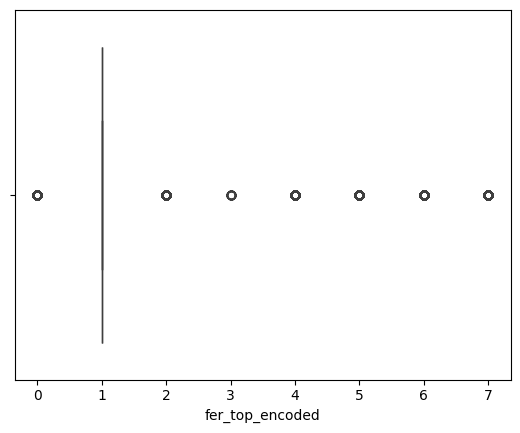

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
sns.boxplot(x=X_categorical['fer_top_encoded'])
plt.show()

In [164]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,  # ข้อมูลการฝึก
    validation_data=(X_test, y_test),  # ข้อมูลการทดสอบ
    epochs=100,  # จำนวนรอบการฝึก
    batch_size=64,  # ขนาดของชุดข้อมูลที่ใช้ฝึกในแต่ละรอบ
    verbose=1,  # ระดับการแสดงผลข้อมูลระหว่างการฝึก
    callbacks=[early_stopping]  # ใช้ EarlyStopping เพื่อหยุดการฝึกเมื่อไม่เห็นผลดีขึ้น
)


Epoch 1/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - loss: 318836.2188 - mae: 340.6481 - val_loss: 104604.5547 - val_mae: 214.8145
Epoch 2/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - loss: 104334.8359 - mae: 213.2391 - val_loss: 104900.4531 - val_mae: 215.5373
Epoch 3/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 171s 13ms/step - loss: 104170.0312 - mae: 212.4487 - val_loss: 103094.8125 - val_mae: 210.7367
Epoch 4/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 149s 11ms/step - loss: 103895.5234 - mae: 211.8517 - val_loss: 102787.7578 - val_mae: 210.4286
Epoch 5/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 124s 10ms/step - loss: 102690.9688 - mae: 210.4757 - val_loss: 102131.7734 - val_mae: 208.9219
Epoch 6/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 152s 12ms/step - loss: 102067.3672 - mae: 209.5217 - val_loss: 101730.4141 - val_mae: 207.8628
Epoch 7/100
13009/13009 ━━━━━━━━━━━━━━━━━━━━ 104s 8ms/step - loss: 102041.9297 - mae: 209.2868 - val_loss: 101737.5469 - val_mae: 207.8922
Epoch 8/100
13009/13009 ━

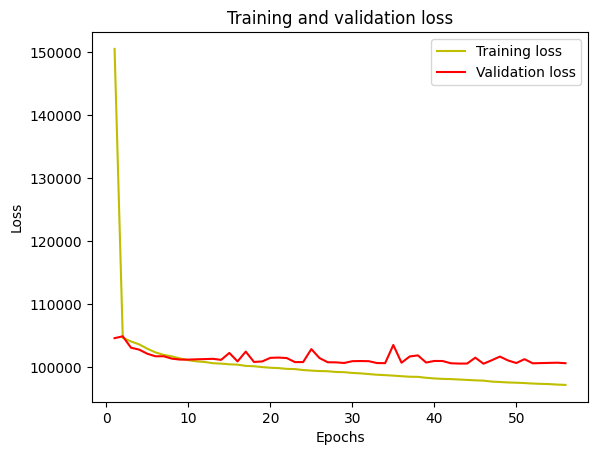

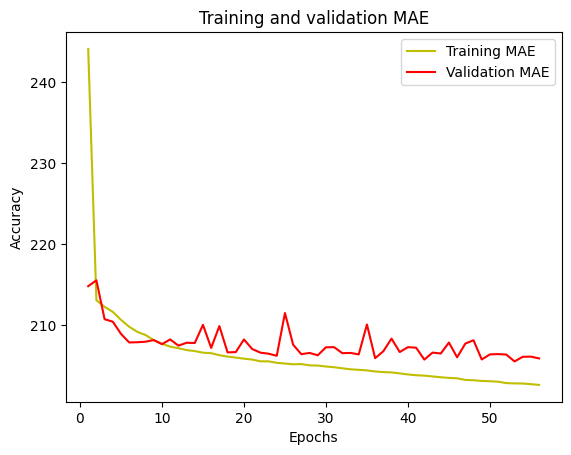

In [165]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


<Figure size 1000x500 with 0 Axes>

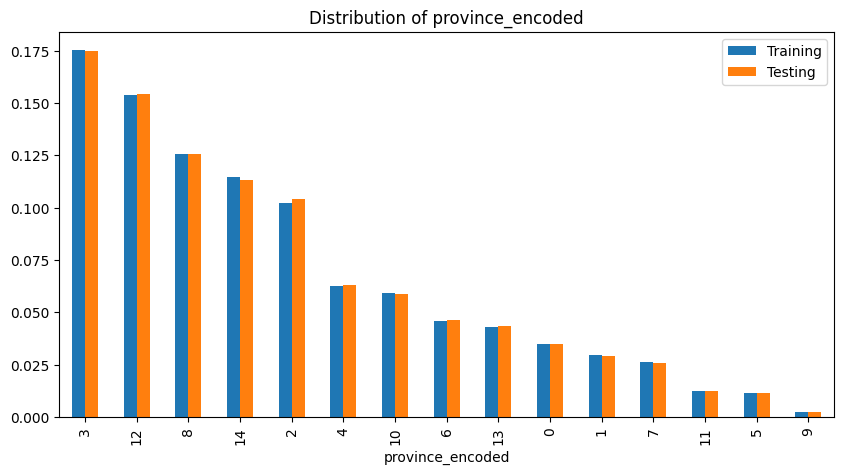

<Figure size 1000x500 with 0 Axes>

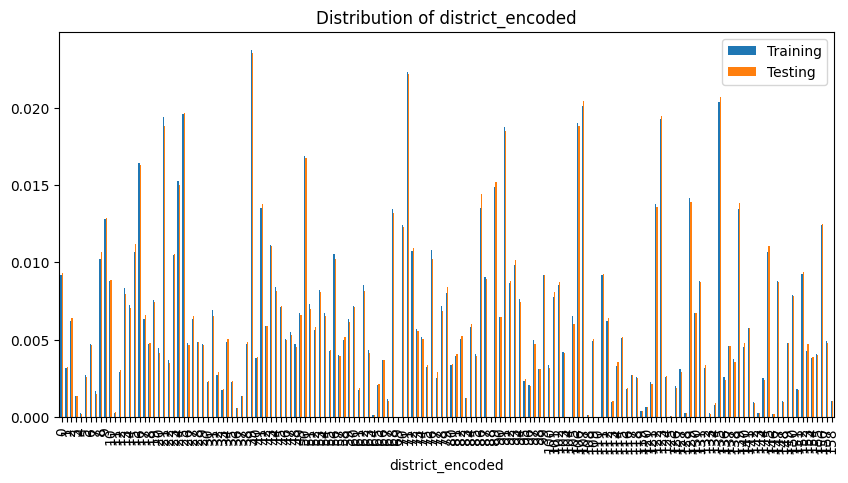

<Figure size 1000x500 with 0 Axes>

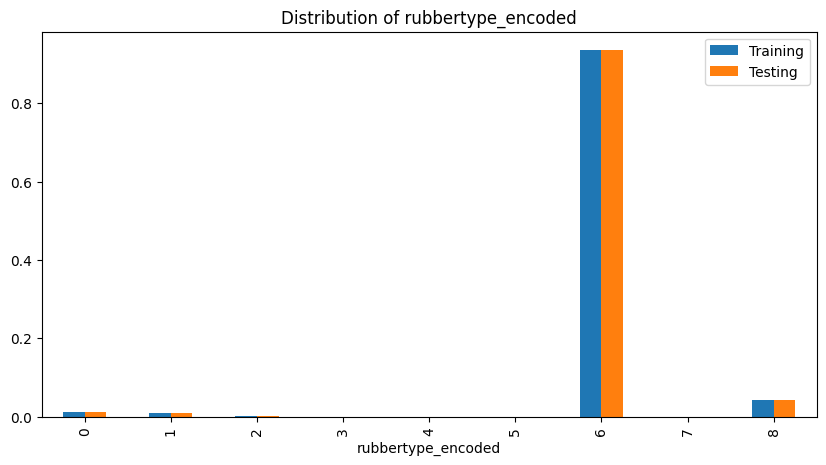

In [36]:
# ตัวอย่างการตรวจสอบตัวแปรเชิงหมวดหมู่
categorical_cols = ['province_encoded', 'district_encoded', 'rubbertype_encoded']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    train_counts = X_train_cat[col].value_counts(normalize=True)
    test_counts = X_test_cat[col].value_counts(normalize=True)
    compare_df = pd.DataFrame({'Training': train_counts, 'Testing': test_counts}).fillna(0)
    compare_df.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Distribution of {col}')
    plt.show()



In [168]:
import pandas as pd
from sklearn.metrics import r2_score
# ทำนายค่าด้วยโมเดล
predictions = model.predict(X_test)

# คำนวณ R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

6505/6505 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step
R-squared: 0.8905441951719275


In [102]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error

# ทำนายค่าด้วยโมเดล
predictions = model.predict(X_test)

# คำนวณ R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# คำนวณ Mean Absolute Error (MAE) เป็นอีกตัวชี้วัดหนึ่ง
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Accuracy ในกรณีของ regression ใช้ R-squared แทน
print(f'The R-squared of the Model Train is {r2_score(y_train, model.predict(X_train)):.2f}')
print(f'The R-squared of the Model Test is {r2:.2f}')


6505/6505 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
R-squared: 0.8937731380444192
Mean Absolute Error: 203.18777462017312
26017/26017 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step
The R-squared of the Model Train is 0.89
The R-squared of the Model Test is 0.89


In [103]:
import pandas as pd

# ทำนายค่าด้วยโมเดล
predictions = model.predict(X_test)

# สร้าง DataFrame เพื่อเปรียบเทียบ predictions กับ y_test
comparison_df = pd.DataFrame({
    'True Values (y_test)': y_test.flatten(),  # y_test อาจจะมีรูปแบบเป็น array 2D จึงใช้ .flatten() เพื่อแปลงให้เป็น 1D
    'Predictions': predictions.flatten()  # predictions ค่าทำนายที่ได้จากโมเดล
})

6505/6505 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


In [109]:
comparison_df.head(150)

,True Values (y_test),Predictions
0,3500.0,3630.071533
1,1200.0,1231.251709
2,2700.0,1742.641602
3,840.0,984.503601
4,350.0,238.991425
...,...,...
145,3600.0,3369.559082
146,2500.0,2214.087402
147,1750.0,1592.942749
148,2500.0,2934.753662


In [108]:
import keras


keras.saving.save_model(model, 'D:/DataSet_Project/pythonCode/saved_model/frist_model.keras')


In [1]:
from tensorflow.keras.models import load_model

# โหลดโมเดล
model = load_model('D:/DataSet_Project/pythonCode/saved_model/frist_model.keras')

# ตรวจสอบโมเดล
model.summary()  # แสดงโครงสร้างของโมเดล


d:\myenv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ province_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ district_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subdistrict_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fer_top_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ soilgroup_input     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_top_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_low_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ province_embedding  │ (None, 1, 8)      │        120 │ province_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ district_embedding  │ (None, 1, 8)      │      1,272 │ district_input[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subdistrict_embedd… │ (None, 1, 8)      │      7,704 │ subdistrict_inpu… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ fer_top_embedding   │ (None, 1, 8)      │         64 │ fer_top_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ soilgroup_embedding │ (None, 1, 8)      │        352 │ soilgroup_input[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_top_embedding    │ (None, 1, 8)      │        160 │ pH_top_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pH_low_embedding    │ (None, 1, 8)      │        168 │ pH_low_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_63          │ (None, 8)         │          0 │ province_embeddi… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_64          │ (None, 8)         │          0 │ district_embeddi… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_65          │ (None, 8)         │          0 │ subdistrict_embe

 Total params: 28,004 (109.39 KB)

 Trainable params: 14,001 (54.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,003 (54.70 KB)

In [2]:
import pandas as pd
from sklearn.metrics import r2_score

# ทำนายค่าด้วยโมเดล
predictions = model.predict(X_test)

# คำนวณ R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

total_params = model.count_params()
print(f"Total parameters: {total_params}")


NameError: name 'X_test' is not defined

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# แปลงจังหวัด, อำเภอ, ตำบล เป็นตัวเลข
province_encoder = LabelEncoder()
district_encoder = LabelEncoder()
subdistrict_encoder = LabelEncoder()
# rubbertype_encoder = LabelEncoder()
fer_top_encoder = LabelEncoder()
soilgroup_encoder = LabelEncoder()
pH_top_encoder = LabelEncoder()
pH_low_encoder = LabelEncoder()
# scaler = StandardScaler()
# scaler.fit(X_numeric)

# ข้อมูลที่ผู้ใช้ป้อน
user_input = {
    "province": "นราธิวาส",
    "district": "สุคิริน",
    "subdistrict": "มาโมง",
    # "rubbertype": "RRIM 600",
    "rubbertreecount": 960,
    "rubberarea": 16,
    "rubbertreeage": 24,
    "fer_top": "L",  # เพิ่มข้อมูลดิน
    "soilgroup": "53/26",   # เพิ่มข้อมูลกลุ่มดิน
    "pH_top": "5.0-5.5",         # เพิ่มข้อมูลค่า pH
    "pH_low": "4.5-5.5",         # เพิ่มข้อมูลค่า pH ที่ระดับล่าง
    "rainfall": 3480,      # เพิ่มข้อมูลปริมาณฝน
    "avg_temperature": 27.81, # เพิ่มข้อมูลอุณหภูมิ
    "rainy_days": 170,     # เพิ่มข้อมูลจำนวนวันฝนตก
    "avg_humidity": 78.91     # เพิ่มข้อมูลความชื้น
}

# แปลงข้อมูลหมวดหมู่
user_categorical = [
    province_encoder.transform([user_input["province"]])[0],
    district_encoder.transform([user_input["district"]])[0],
    subdistrict_encoder.transform([user_input["subdistrict"]])[0],
    # rubbertype_encoder.transform([user_input["rubbertype"]])[0],
    fer_top_encoder.transform([user_input["fer_top"]])[0],    # แปลงข้อมูลดิน
    soilgroup_encoder.transform([user_input["soilgroup"]])[0],  # แปลงข้อมูลกลุ่มดิน
    pH_top_encoder.transform([user_input["pH_top"]])[0],         # แปลงข้อมูล pH บน
    pH_low_encoder.transform([user_input["pH_low"]])[0]          # แปลงข้อมูล pH ล่าง
]

# แปลงข้อมูลเชิงตัวเลข
user_numeric = np.array([[
    user_input["rubberarea"], 
    user_input["rubbertreecount"],
    user_input["rubbertreeage"],
    user_input["rainfall"],
    user_input["avg_temperature"],
    user_input["rainy_days"],
    user_input["avg_humidity"]
]])

user_numeric_scaler = scaler.transform(user_numeric)

# พยากรณ์ผลผลิต
user_prediction = model.predict([np.array([user_categorical[0]]),
                                  np.array([user_categorical[1]]),
                                  np.array([user_categorical[2]]),
                                  np.array([user_categorical[3]]),
                                  np.array([user_categorical[4]]),
                                  np.array([user_categorical[5]]),
                                  np.array([user_categorical[6]]),
                                #   np.array([user_categorical[7]]),
                                  user_numeric_scaler])
print(f"ผลผลิตที่คาดการณ์: {user_prediction[0][0]:.2f} กก.")


NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [99]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# สมมติว่าโมเดลของคุณถูกฝึกแล้ว
# model = load_model()  # โหลดโมเดลที่ฝึกแล้ว

# ฟังก์ชั่นเพื่อรับข้อมูลจากผู้ใช้
def get_user_input():
    # รับข้อมูลจากผู้ใช้
    province = input("กรุณากรอกชื่อจังหวัด: ")
    district = input("กรุณากรอกชื่ออำเภอ: ")
    subdistrict = input("กรุณากรอกชื่อตำบล: ")
    rubbertreecount = float(input("กรุณากรอกจำนวนต้นยาง: "))
    rubberarea = float(input("กรุณากรอกพื้นที่ปลูกยาง (ไร่): "))
    rubbertreeage = int(input("กรุณากรอกอายุต้นยาง (ปี): "))
    fer_top = input("กรุณากรอกข้อมูลดิน (ประเภทดิน): ")
    soilgroup = input("กรุณากรอกกลุ่มดิน: ")
    pH_top = input("กรุณากรอกค่า pH ดินบน: ")
    pH_low = input("กรุณากรอกค่า pH ดินล่าง: ")
    rainfall = float(input("กรุณากรอกปริมาณฝน (มม.): "))
    avg_temperature = float(input("กรุณากรอกอุณหภูมิ (องศาเซลเซียส): "))
    rainy_days = int(input("กรุณากรอกจำนวนวันฝนตก: "))
    avg_humidity = float(input("กรุณากรอกความชื้นเฉลี่ย: "))

    return {
        "province": province,
        "district": district,
        "subdistrict": subdistrict,
        "rubbertreecount": rubbertreecount,
        "rubberarea": rubberarea,
        "rubbertreeage": rubbertreeage,
        "fer_top": fer_top,
        "soilgroup": soilgroup,
        "pH_top": pH_top,
        "pH_low": pH_low,
        "rainfall": rainfall,
        "avg_temperature": avg_temperature,
        "rainy_days": rainy_days,
        "avg_humidity": avg_humidity
    }

# ฟังก์ชั่นเพื่อแปลงข้อมูลและพยากรณ์ผลผลิต
def predict_yield(user_input):
    # สร้าง LabelEncoder สำหรับการแปลงข้อมูลหมวดหมู่
    province_encoder = LabelEncoder()
    district_encoder = LabelEncoder()
    subdistrict_encoder = LabelEncoder()
    fer_top_encoder = LabelEncoder()
    soilgroup_encoder = LabelEncoder()
    pH_top_encoder = LabelEncoder()
    pH_low_encoder = LabelEncoder()

    # แปลงข้อมูลหมวดหมู่
    province_encoded = province_encoder.fit_transform([user_input["province"]])[0]
    district_encoded = district_encoder.fit_transform([user_input["district"]])[0]
    subdistrict_encoded = subdistrict_encoder.fit_transform([user_input["subdistrict"]])[0]
    fer_top_encoded = fer_top_encoder.fit_transform([user_input["fer_top"]])[0]
    soilgroup_encoded = soilgroup_encoder.fit_transform([user_input["soilgroup"]])[0]
    pH_top_encoded = pH_top_encoder.fit_transform([user_input["pH_top"]])[0]
    pH_low_encoded = pH_low_encoder.fit_transform([user_input["pH_low"]])[0]
    
    # X_categorical = merged_df_cleaned_cleaned[["province_encoded", "district_encoded", "subdistrict_encoded","fer_top_encoded","soilgroup_encoded","pH_top_encoded","pH_low_encoded"]]
    # X_numeric = merged_df_cleaned_cleaned[["rubberarea", "rubbertreecount","rubbertreeage","rainfall","avg_temperature","rainy_days","avg_humidity"]]
    
    
    # ข้อมูลตัวเลข
    user_numeric = np.array([[user_input["rubberarea"], 
                              user_input["rubbertreecount"],
                              user_input["rubbertreeage"],
                              user_input["rainfall"],
                              user_input["avg_temperature"],
                              user_input["rainy_days"],
                              user_input["avg_humidity"]]])

    # เตรียมข้อมูลสำหรับโมเดล
    user_categorical = [
        province_encoded, 
        district_encoded, 
        subdistrict_encoded,
        fer_top_encoded, 
        soilgroup_encoded, 
        pH_top_encoded, 
        pH_low_encoded
    ]
    
    # สมมติว่าโมเดลของคุณคือ 'model'
    # กรณีนี้สมมติว่าโมเดลมีการทำนายผลผลิตโดยใช้ข้อมูลที่แปลงแล้ว
    
    user_input_data = [
        np.array([user_categorical[0]]),
        np.array([user_categorical[1]]),
        np.array([user_categorical[2]]),
        np.array([user_categorical[3]]),
        np.array([user_categorical[4]]),
        np.array([user_categorical[5]]),
        np.array([user_categorical[6]]),
        user_numeric
    ]

    prediction = model.predict(user_input_data)
    
    return prediction[0][0]  # ผลผลิตที่คาดการณ์

# รับข้อมูลจากผู้ใช้
user_input = get_user_input()

# คาดการณ์ผลผลิต
predicted_yield = predict_yield(user_input)

print(f"ผลผลิตยางพาราที่คาดการณ์: {predicted_yield:.2f} กก.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
ผลผลิตยางพาราที่คาดการณ์: 3278.61 กก.


## NN สิ้นสุดตรงนี้

In [36]:
 # กำหนดขนาดหมวดหมู่
n_provinces = len(province_encoder.classes_)
n_districts = len(district_encoder.classes_)
n_subdistricts = len(subdistrict_encoder.classes_)
n_fer_top = len(fer_top_encoder.classes_)  # สำหรับ fer_top_encoded
n_soilgroup = len(soilgroup_encoder.classes_)  # สำหรับ soilgroup_encoded
n_pH_top = len(pH_top_encoder.classes_)  # สำหรับ pH_top_encoded
n_pH_low = len(pH_low_encoder.classes_)  # สำหรับ pH_low_encoded

In [37]:
def create_model(embedding_dim, neurons, learning_rate):
    # Inputs
    province_input = Input(shape=(1,), name="province_input")
    district_input = Input(shape=(1,), name="district_input")
    subdistrict_input = Input(shape=(1,), name="subdistrict_input")
    fer_top_input = Input(shape=(1,), name="fer_top_input")
    soilgroup_input = Input(shape=(1,), name="soilgroup_input")
    pH_top_input = Input(shape=(1,), name="pH_top_input")
    pH_low_input = Input(shape=(1,), name="pH_low_input")
    numeric_input = Input(shape=(X_numeric.shape[1],), name="numeric_input")

    # Embedding layers
    province_embedding = Embedding(input_dim=n_provinces, output_dim=embedding_dim)(province_input)
    district_embedding = Embedding(input_dim=n_districts, output_dim=embedding_dim)(district_input)
    subdistrict_embedding = Embedding(input_dim=n_subdistricts, output_dim=embedding_dim)(subdistrict_input)
    fer_top_embedding = Embedding(input_dim=n_fer_top, output_dim=embedding_dim)(fer_top_input)
    soilgroup_embedding = Embedding(input_dim=n_soilgroup, output_dim=embedding_dim)(soilgroup_input)
    pH_top_embedding = Embedding(input_dim=n_pH_top, output_dim=embedding_dim)(pH_top_input)
    pH_low_embedding = Embedding(input_dim=n_pH_low, output_dim=embedding_dim)(pH_low_input)

    # Flatten embeddings
    province_flatten = Flatten()(province_embedding)
    district_flatten = Flatten()(district_embedding)
    subdistrict_flatten = Flatten()(subdistrict_embedding)
    fer_top_flatten = Flatten()(fer_top_embedding)
    soilgroup_flatten = Flatten()(soilgroup_embedding)
    pH_top_flatten = Flatten()(pH_top_embedding)
    pH_low_flatten = Flatten()(pH_low_embedding)

    # Concatenate all features
    concatenated = Concatenate()([
        province_flatten, district_flatten, subdistrict_flatten,
        fer_top_flatten, soilgroup_flatten, pH_top_flatten, pH_low_flatten, numeric_input
    ])

    # Dense layers
    dense = Dense(neurons, activation="relu")(concatenated)
    output = Dense(1, activation="linear")(dense)

    # Build and compile model
    model = Model(inputs=[
        province_input, district_input, subdistrict_input, fer_top_input, soilgroup_input, pH_top_input, pH_low_input, numeric_input
    ], outputs=output)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

    return model


In [39]:
import optuna

def objective(trial):
    # Define hyperparameters
    embedding_dim = trial.suggest_categorical('embedding_dim', [4, 8, 16])
    neurons = trial.suggest_categorical('neurons', [64, 128, 256])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])

    # Build model
    model = create_model(embedding_dim, neurons, learning_rate)

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=20, batch_size=batch_size, verbose=1
    )

    # Return validation loss
    return min(history.history['val_loss'])

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_params)


[I 2025-01-04 02:51:05,303] A new study created in memory with name: no-name-18ed703c-1011-41f5-806d-8f6f95c4ec56
C:\Users\Toon\AppData\Local\Temp\ipykernel_19520\2037896400.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)


Epoch 1/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 279s 2ms/step - loss: 253355.3750 - mae: 311.2032 - val_loss: 144338.2656 - val_mae: 256.2539
Epoch 2/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 283s 3ms/step - loss: 135924.0156 - mae: 243.3705 - val_loss: 126540.6250 - val_mae: 231.5314
Epoch 3/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 258s 2ms/step - loss: 126483.8594 - mae: 232.8685 - val_loss: 126118.4375 - val_mae: 231.3987
Epoch 4/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 256s 2ms/step - loss: 125435.1016 - mae: 230.9802 - val_loss: 128816.6953 - val_mae: 237.3923
Epoch 5/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 253s 2ms/step - loss: 125098.1797 - mae: 230.6099 - val_loss: 124829.7812 - val_mae: 228.6370
Epoch 6/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 257s 2ms/step - loss: 125112.3281 - mae: 230.1411 - val_loss: 128850.2812 - val_mae: 237.0797
Epoch 7/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 248s 2ms/step - loss: 124674.3516 - mae: 229.5070 - val_loss: 127529.5938 - val_mae: 236.6429
Epoch 8/20
110787/11

[I 2025-01-04 04:37:20,670] Trial 0 finished with value: 123068.9609375 and parameters: {'embedding_dim': 8, 'neurons': 256, 'learning_rate': 0.0001197216066939967, 'batch_size': 8}. Best is trial 0 with value: 123068.9609375.


Epoch 1/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - loss: 200725.1875 - mae: 283.5280 - val_loss: 126243.3281 - val_mae: 231.1871
Epoch 2/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 128346.3203 - mae: 236.8263 - val_loss: 126591.4844 - val_mae: 231.6440
Epoch 3/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 172s 6ms/step - loss: 127031.2812 - mae: 234.3120 - val_loss: 124556.9609 - val_mae: 227.8756
Epoch 4/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 204s 7ms/step - loss: 126314.2344 - mae: 233.0356 - val_loss: 130875.2188 - val_mae: 233.6793
Epoch 5/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 164s 6ms/step - loss: 125326.8359 - mae: 231.6147 - val_loss: 123982.7578 - val_mae: 227.7899
Epoch 6/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - loss: 124899.5703 - mae: 230.8248 - val_loss: 123281.1719 - val_mae: 226.6711
Epoch 7/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - loss: 123951.2188 - mae: 229.7869 - val_loss: 123506.3672 - val_mae: 227.3343
Epoch 8/20
27697/27697 ━━━━━━━━━━━━━━━

[I 2025-01-04 05:12:43,719] Trial 1 finished with value: 122586.140625 and parameters: {'embedding_dim': 16, 'neurons': 64, 'learning_rate': 0.0023455407540531946, 'batch_size': 32}. Best is trial 1 with value: 122586.140625.


Epoch 1/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 391s 3ms/step - loss: 160031.7188 - mae: 266.2809 - val_loss: 127124.0078 - val_mae: 231.3893
Epoch 2/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 369s 3ms/step - loss: 131304.9531 - mae: 239.9535 - val_loss: 131214.7969 - val_mae: 236.3302
Epoch 3/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 475s 4ms/step - loss: 129222.2500 - mae: 237.5378 - val_loss: 131969.3438 - val_mae: 237.3435
Epoch 4/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 452s 4ms/step - loss: 128094.4922 - mae: 235.4374 - val_loss: 140253.5938 - val_mae: 260.4018
Epoch 5/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 431s 4ms/step - loss: 127167.0312 - mae: 234.6535 - val_loss: 127666.7578 - val_mae: 232.3128
Epoch 6/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 459s 4ms/step - loss: 126819.0000 - mae: 234.4095 - val_loss: 128350.7578 - val_mae: 238.7790
Epoch 7/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 508s 5ms/step - loss: 126352.5469 - mae: 233.6141 - val_loss: 126770.4453 - val_mae: 231.9578
Epoch 8/20
110787/11

[I 2025-01-04 08:15:33,887] Trial 2 finished with value: 125022.8359375 and parameters: {'embedding_dim': 8, 'neurons': 128, 'learning_rate': 0.004451015101935422, 'batch_size': 8}. Best is trial 1 with value: 122586.140625.


Epoch 1/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 170s 6ms/step - loss: 222686.7188 - mae: 295.3098 - val_loss: 126194.3359 - val_mae: 231.4502
Epoch 2/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 129s 5ms/step - loss: 128726.5469 - mae: 236.2460 - val_loss: 129955.9844 - val_mae: 238.8350
Epoch 3/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 146s 5ms/step - loss: 126588.2344 - mae: 233.4153 - val_loss: 124417.8516 - val_mae: 227.4831
Epoch 4/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 132s 5ms/step - loss: 125480.5781 - mae: 231.8188 - val_loss: 138337.4688 - val_mae: 247.3557
Epoch 5/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 130s 5ms/step - loss: 125807.2578 - mae: 231.8371 - val_loss: 124256.5547 - val_mae: 227.0019
Epoch 6/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - loss: 125336.4609 - mae: 231.0207 - val_loss: 124054.1953 - val_mae: 226.9795
Epoch 7/20
27697/27697 ━━━━━━━━━━━━━━━━━━━━ 191s 7ms/step - loss: 124997.2344 - mae: 230.5642 - val_loss: 125655.0859 - val_mae: 232.4596
Epoch 8/20
27697/27697 ━━━━━━━━━━━

[I 2025-01-04 09:17:40,674] Trial 3 finished with value: 122610.5390625 and parameters: {'embedding_dim': 4, 'neurons': 128, 'learning_rate': 0.0010150180432695643, 'batch_size': 32}. Best is trial 1 with value: 122586.140625.


Epoch 1/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 779s 7ms/step - loss: 159455.6094 - mae: 265.5985 - val_loss: 129921.8203 - val_mae: 234.0879
Epoch 2/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 800s 7ms/step - loss: 130673.4297 - mae: 239.6214 - val_loss: 133243.6094 - val_mae: 238.1826
Epoch 3/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 874s 8ms/step - loss: 128834.7188 - mae: 236.5911 - val_loss: 126016.8438 - val_mae: 230.2848
Epoch 4/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 940s 8ms/step - loss: 127605.3984 - mae: 234.8098 - val_loss: 127628.5078 - val_mae: 233.4782
Epoch 5/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 938s 8ms/step - loss: 127233.6562 - mae: 234.1376 - val_loss: 128860.5312 - val_mae: 232.3226
Epoch 6/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 890s 8ms/step - loss: 126469.6797 - mae: 233.2647 - val_loss: 128723.0000 - val_mae: 233.6257
Epoch 7/20
110787/110787 ━━━━━━━━━━━━━━━━━━━━ 904s 8ms/step - loss: 126806.6797 - mae: 233.5712 - val_loss: 125797.0469 - val_mae: 231.8837
Epoch 8/20
110787/11

[W 2025-01-04 12:41:24,791] Trial 4 failed with parameters: {'embedding_dim': 16, 'neurons': 256, 'learning_rate': 0.002872505285248909, 'batch_size': 8} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "d:\myenv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Toon\AppData\Local\Temp\ipykernel_19520\2037896400.py", line 14, in objective
    history = model.fit(
              ^^^^^^^^^^
  File "d:\myenv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "d:\myenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 368, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\myenv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 216, in function
    opt_outputs = mult

KeyboardInterrupt: 

In [31]:
unique_subdistricts = merged_df_cleaned['subdistrict'].unique()
num_unique_subdistricts = len(unique_subdistricts)
print(f'Number of unique subdistricts: {num_unique_subdistricts}')



Number of unique subdistricts: 963


In [38]:
# การสุ่ม 500 แถวจากแต่ละตำบล หากมีข้อมูลน้อยกว่า 500 จะเลือกทั้งหมด
sampled_df = merged_df_cleaned.groupby('subdistrict').apply(
    lambda x: x.sample(n=min(len(x), 100), random_state=42)
)

# รีเซ็ตดัชนีของ DataFrame เพื่อให้ดูง่าย
sampled_df = sampled_df.reset_index(drop=True)

# แสดงตัวอย่างข้อมูลที่สุ่มได้
sampled_df


C:\Users\Toon\AppData\Local\Temp\ipykernel_28344\2533924905.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = merged_df_cleaned.groupby('subdistrict').apply(


,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,rainfall,avg_temperature,...,production_per_area,log_rubbertreecount,log_rubberarea,log_dryrubbercontent,zscore_rubbertreecount,zscore_rubberarea,zscore_dryrubber,zscore_production_per_tree,zscore_production_per_area,anomaly
0,พัทลุง,กงหรา,กงหรา,1200.0,3.0,350,21,RRIM 600,2335.9,27.81,...,400.000000,5.860786,1.386294,7.090910,-0.274434,-0.925219,-0.236041,-0.006649,0.031439,1
1,พัทลุง,กงหรา,กงหรา,4080.0,17.0,1750,31,RRIM 600,2335.9,27.81,...,240.000000,7.467942,2.890372,8.314097,1.772590,1.354829,1.189133,-0.022641,-0.007996,1
2,พัทลุง,กงหรา,กงหรา,1272.0,6.0,410,28,RRIM 600,2335.9,27.81,...,212.000000,6.018593,1.945910,7.149132,-0.073437,-0.076891,-0.168205,-0.011403,-0.014897,1
3,พัทลุง,กงหรา,กงหรา,800.0,3.0,260,19,RRIM 600,2335.9,27.81,...,266.666667,5.564520,1.386294,6.685861,-0.651786,-0.925219,-0.707976,-0.011775,-0.001423,1
4,พัทลุง,กงหรา,กงหรา,250.0,2.0,150,21,RRIM 600,2335.9,27.81,...,125.000000,5.017280,1.098612,5.525453,-1.348803,-1.361319,-2.060004,-0.032331,-0.036340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88351,กระบี่,เมืองกระบี่,ไสไทย,4500.0,11.0,1000,20,BPM 24,1574.2,29.03,...,409.090909,6.908755,2.484907,8.412055,1.060357,0.740180,1.303267,0.008969,0.033679,1
88352,กระบี่,เมืองกระบี่,ไสไทย,1725.0,6.0,550,18,RRIM 600,1574.2,29.03,...,287.500000,6.311735,1.945910,7.453562,0.299936,-0.076891,0.186496,-0.010908,0.003711,1
88353,กระบี่,เมืองกระบี่,ไสไทย,717.0,3.0,201,18,RRIM 600,1574.2,29.03,...,239.000000,5.308268,1.386294,6.576470,-0.978174,-0.925219,-0.835431,-0.004629,-0.008242,1
88354,กระบี่,เมืองกระบี่,ไสไทย,3500.0,15.0,1100,33,RRIM 600,1574.2,29.03,...,233.333333,7.003974,2.772589,8.160804,1.181637,1.176280,1.010526,-0.010246,-0.009639,1


In [35]:
unique_sampled_df = sampled_df['subdistrict'].unique()
num_unique_sampled_df = len(unique_sampled_df)
print(f'Number of unique subdistricts: {num_unique_sampled_df}')

Number of unique subdistricts: 963


In [9]:
# import dask.dataframe as dd


# merged_dd = dd.from_pandas(merged_df_cleaned, npartitions=4)

In [12]:
merged_df_cleaned.head()

,province,district,subdistrict,dryrubbercontent,rubberarea,rubbertreecount,rubbertreeage,rubbertype,rainfall,avg_temperature,...,production_per_area,log_rubbertreecount,log_rubberarea,log_dryrubbercontent,zscore_rubbertreecount,zscore_rubberarea,zscore_dryrubber,zscore_production_per_tree,zscore_production_per_area,anomaly
0,นราธิวาส,สุคิริน,มาโมง,2700.0,16.0,960,24,RRIM 600,3480.0,27.81,...,168.75,6.867974,2.833213,7.901377,1.008415,1.268181,0.708260,-0.015629,-0.025557,1
1,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,...,300.00,4.394449,0.693147,5.707110,-2.142099,-1.975968,-1.848349,-0.001964,0.006792,1
2,ปัตตานี,โคกโพธิ์,โคกโพธิ์,300.0,1.0,80,13,RRIM 600,2534.5,27.85,...,300.00,4.394449,0.693147,5.707110,-2.142099,-1.975968,-1.848349,-0.001964,0.006792,1
3,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,...,264.00,5.993961,1.791759,7.186144,-0.104810,-0.310570,-0.125080,-0.008523,-0.002081,1
4,ปัตตานี,โคกโพธิ์,โคกโพธิ์,1320.0,5.0,400,38,RRIM 600,2534.5,27.85,...,264.00,5.993961,1.791759,7.186144,-0.104810,-0.310570,-0.125080,-0.008523,-0.002081,1


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# ตัวอย่างการแปลงข้อมูล One-Hot Encoding สำหรับแต่ละคอลัมน์
encoder_province = OneHotEncoder(sparse_output=False)
encoder_district = OneHotEncoder(sparse_output=False)
# encoder_subdistrict = OneHotEncoder(sparse_output=False)
encoder_rubbertype = OneHotEncoder(sparse_output=False)
encoder_fer_top = OneHotEncoder(sparse_output=False)
encoder_soilgroup = OneHotEncoder(sparse_output=False)
encoder_pH_top = OneHotEncoder(sparse_output=False)
encoder_pH_low = OneHotEncoder(sparse_output=False)

# ทำ One-Hot Encoding และสร้าง DataFrame ใหม่สำหรับแต่ละคอลัมน์
province_encoded = pd.DataFrame(encoder_province.fit_transform(sampled_df[['province']]), 
                                columns=encoder_province.get_feature_names_out(), 
                                index=sampled_df.index)

district_encoded = pd.DataFrame(encoder_district.fit_transform(sampled_df[['district']]), 
                                columns=encoder_district.get_feature_names_out(), 
                                index=sampled_df.index)


# subdistrict_encoded = pd.DataFrame(encoder_subdistrict.fit_transform(sampled_df[['subdistrict']]), 
#                                 columns=encoder_subdistrict.get_feature_names_out(), 
#                                 index=sampled_df.index)

rubbertype_encoded = pd.DataFrame(encoder_rubbertype.fit_transform(sampled_df[['rubbertype']]), 
                                  columns=encoder_rubbertype.get_feature_names_out(), 
                                  index=sampled_df.index)

fer_top_encoded = pd.DataFrame(encoder_fer_top.fit_transform(sampled_df[['fer_top']]), 
                               columns=encoder_fer_top.get_feature_names_out(), 
                               index=sampled_df.index)

soilgroup_encoded = pd.DataFrame(encoder_soilgroup.fit_transform(sampled_df[['soilgroup']]), 
                                 columns=encoder_soilgroup.get_feature_names_out(), 
                                 index=sampled_df.index)

pH_top_encoded = pd.DataFrame(encoder_pH_top.fit_transform(sampled_df[['pH_top']]), 
                              columns=encoder_pH_top.get_feature_names_out(), 
                              index=sampled_df.index)

pH_low_encoded = pd.DataFrame(encoder_pH_low.fit_transform(sampled_df[['pH_low']]), 
                              columns=encoder_pH_low.get_feature_names_out(), 
                              index=sampled_df.index)

# รวมข้อมูลที่ถูกแปลงแล้วด้วย pd.concat โดยรักษาดัชนี
one_hot_df = pd.concat([province_encoded, district_encoded, rubbertype_encoded, 
                        fer_top_encoded, soilgroup_encoded, pH_top_encoded, 
                        pH_low_encoded], axis=1)

MemoryError: Unable to allocate 649. MiB for an array with shape (88356, 963) and data type float64

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# สมมติว่า merged_df_cleaned เป็น DataFrame ที่มีข้อมูลของคุณ

# สร้าง OneHotEncoder สำหรับแต่ละคอลัมน์
encoder_province = OneHotEncoder(sparse_output=True)
encoder_district = OneHotEncoder(sparse_output=True)
encoder_subdistrict = OneHotEncoder(sparse_output=True)
encoder_rubbertype = OneHotEncoder(sparse_output=True)
encoder_fer_top = OneHotEncoder(sparse_output=True)
encoder_soilgroup = OneHotEncoder(sparse_output=True)
encoder_pH_top = OneHotEncoder(sparse_output=True)
encoder_pH_low = OneHotEncoder(sparse_output=True)

# ทำ One-Hot Encoding สำหรับแต่ละคอลัมน์
province_encoded = encoder_province.fit_transform(merged_df_cleaned[['province']])
district_encoded = encoder_district.fit_transform(merged_df_cleaned[['district']])
subdistrict_encoded = encoder_subdistrict.fit_transform(merged_df_cleaned[['subdistrict']])
rubbertype_encoded = encoder_rubbertype.fit_transform(merged_df_cleaned[['rubbertype']])
fer_top_encoded = encoder_fer_top.fit_transform(merged_df_cleaned[['fer_top']])
soilgroup_encoded = encoder_soilgroup.fit_transform(merged_df_cleaned[['soilgroup']])
pH_top_encoded = encoder_pH_top.fit_transform(merged_df_cleaned[['pH_top']])
pH_low_encoded = encoder_pH_low.fit_transform(merged_df_cleaned[['pH_low']])

# แปลง Sparse matrix เป็น DataFrame พร้อมชื่อคอลัมน์
province_encoded_df = pd.DataFrame.sparse.from_spmatrix(province_encoded, columns=encoder_province.get_feature_names_out())
district_encoded_df = pd.DataFrame.sparse.from_spmatrix(district_encoded, columns=encoder_district.get_feature_names_out())
subdistrict_encoded_df = pd.DataFrame.sparse.from_spmatrix(subdistrict_encoded, columns=encoder_subdistrict.get_feature_names_out())
rubbertype_encoded_df = pd.DataFrame.sparse.from_spmatrix(rubbertype_encoded, columns=encoder_rubbertype.get_feature_names_out())
fer_top_encoded_df = pd.DataFrame.sparse.from_spmatrix(fer_top_encoded, columns=encoder_fer_top.get_feature_names_out())
soilgroup_encoded_df = pd.DataFrame.sparse.from_spmatrix(soilgroup_encoded, columns=encoder_soilgroup.get_feature_names_out())
pH_top_encoded_df = pd.DataFrame.sparse.from_spmatrix(pH_top_encoded, columns=encoder_pH_top.get_feature_names_out())
pH_low_encoded_df = pd.DataFrame.sparse.from_spmatrix(pH_low_encoded, columns=encoder_pH_low.get_feature_names_out())

# รวมข้อมูลที่ถูกแปลงแล้ว
one_hot_df = pd.concat([province_encoded_df, district_encoded_df, subdistrict_encoded_df, rubbertype_encoded_df, 
                        fer_top_encoded_df, soilgroup_encoded_df, pH_top_encoded_df, pH_low_encoded_df], axis=1)

# # แสดงผลลัพธ์
# print(one_hot_df)


In [15]:
one_hot_df

,province_กระบี่,province_ชุมพร,province_ตรัง,province_นครศรีธรรมราช,province_นราธิวาส,province_ประจวบคีรีขันธ์,province_ปัตตานี,province_พังงา,province_พัทลุง,province_ภูเก็ต,...,pH_low_6.0-7.0,pH_low_6.0-8.0,pH_low_6.5-8.0,pH_low_7.5-8.0,pH_low_<4.5,pH_low_zBEACH,pH_low_zI,pH_low_zMARSH,pH_low_zSC,pH_low_zW
0,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107859,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1107860,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1107861,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1107862,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# ตรวจสอบจำนวนแถวใน merged_df_cleaned
print(len(merged_df_cleaned))

# ตรวจสอบจำนวนแถวใน one_hot_df
print(len(one_hot_df))


1107864
1107864


In [11]:
one_hot_df.index = merged_df_cleaned.index


In [23]:
# รวมข้อมูล one_hot_df กับ merged_df ที่เหลือ โดยใช้ pd.concat และรักษาดัชนี
X = pd.concat([one_hot_df, merged_df_cleaned[['rubberarea', 'rubbertreecount','rubbertreeage','rainfall','avg_temperature','rainy_days','avg_humidity']]], axis=1)

# ตัวแปรเป้าหมาย
y = merged_df_cleaned['dryrubbercontent']

In [24]:
X

,province_กระบี่,province_ชุมพร,province_ตรัง,province_นครศรีธรรมราช,province_นราธิวาส,province_ประจวบคีรีขันธ์,province_ปัตตานี,province_พังงา,province_พัทลุง,province_ภูเก็ต,...,pH_low_zMARSH,pH_low_zSC,pH_low_zW,rubberarea,rubbertreecount,rubbertreeage,rainfall,avg_temperature,rainy_days,avg_humidity
0,0,0,0,0,1.0,0,0,0,0,0,...,0,0,0,16.0,960,24,3480.0,27.81,170,78.91
1,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,1.0,80,13,2534.5,27.85,158,80.08
2,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,1.0,80,13,2534.5,27.85,158,80.08
3,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,5.0,400,38,2534.5,27.85,158,80.08
4,0,0,0,0,0,0,1.0,0,0,0,...,0,0,0,5.0,400,38,2534.5,27.85,158,80.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251600,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,8.0,540,31,2750.0,27.85,178,82.50
1251601,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,5.0,400,19,2750.0,27.85,178,82.50
1251602,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,6.0,450,31,2750.0,27.85,178,82.50
1251603,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,20.0,1600,19,2750.0,27.85,178,82.50


In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Step 4: Optional - Train a machine learning model to predict suitability
# Features and target (using SuitabilityPercent as the target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

name = 'RandomForestRegressor'
y_pred = model.predict(X_test)
R2_score = r2_score(y_test, y_pred)

acc = (model.score(X_train , y_train)*100)
print(f'The accuracy of the {name} Model Train is {acc:.2f}')
acc =(model.score(X_test , y_test)*100)
print(f'The accuracy of the  {name} Model Test is {acc:.2f}')
print(R2_score)

d:\myenv\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MemoryError: Unable to allocate 8.23 GiB for an array with shape (1247, 886291) and data type float64

In [22]:
import dask.dataframe as dd
import pandas as pd

# แปลง merged_df_cleaned เป็น Dask DataFrame
merged_df_cleaned_dask = dd.from_pandas(merged_df_cleaned, npartitions=4)

# รวมข้อมูล one_hot_df (ที่แปลงจาก Dask) เข้ากับ merged_df_cleaned_dask
one_hot_df_dask = dd.from_pandas(one_hot_df, npartitions=4)
X_dask = dd.concat([one_hot_df_dask, merged_df_cleaned_dask[['rubberarea', 'rubbertreecount', 'rubbertreeage', 
                                                            'rainfall', 'avg_temperature', 'rainy_days', 'avg_humidity']]], axis=1)

# ตัวแปรเป้าหมาย
y_dask = merged_df_cleaned_dask['dryrubbercontent']

# สามารถคำนวณได้ด้วย .compute()
X_df = X_dask.compute()
y_df = y_dask.compute()


In [29]:
import dask.dataframe as dd
# แปลงข้อมูลเป็น Dask DataFrame
X = dd.from_pandas(X, npartitions=10)  # แบ่งเป็น 10 partitions
y = dd.from_pandas(y, npartitions=10)

In [ ]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.wrappers import ParallelPostFit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# แบ่งข้อมูล train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# สร้างโมเดล Random Forest ผ่าน Dask
model = ParallelPostFit(estimator=RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))

# ฝึกโมเดล
model.fit(X_train.compute(), y_train.compute())  # ใช้ .compute() เพื่อแปลงเป็น Pandas DataFrame/Series สำหรับ sklearn


# ทำนายผล
predictions = model.predict(X_test)
name = 'RandomForestRegressor'
y_pred = model.predict(X_test)
R2_score = r2_score(y_test, y_pred)

acc = (model.score(X_train , y_train)*100)
print(f'The accuracy of the {name} Model Train is {acc:.2f}')
acc =(model.score(X_test , y_test)*100)
print(f'The accuracy of the  {name} Model Test is {acc:.2f}')

d:\myenv\Lib\site-packages\dask_ml\model_selection\_split.py:464: FutureWarning: The default value for 'shuffle' must be specified when splitting DataFrames. In the future DataFrames will automatically be shuffled within blocks prior to splitting. Specify 'shuffle=True' to adopt the future behavior now, or 'shuffle=False' to retain the previous behavior.
  warnings.warn(
d:\myenv\Lib\site-packages\sklearn\utils\validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MemoryError: Unable to allocate 8.24 GiB for an array with shape (1247, 886785) and data type float64

In [11]:
unique_province = merged_dd['province'].unique()
unique_districts = merged_dd['district'].unique()
unique_subdistricts = merged_dd['subdistrict'].unique()
unique_rubbertype = merged_dd['rubbertype'].unique()
unique_fer_top = merged_dd['fer_top'].unique()
unique_soilgroup = merged_dd['soilgroup'].unique()
unique_pH_top = merged_dd['pH_top'].unique()
unique_pH_low = merged_dd['pH_low'].unique()

In [12]:
# อันใหม่ทำแบบเป็น df
unique_province = pd.DataFrame({'province': merged_df_cleaned['province'].unique()})
unique_districts = pd.DataFrame({'district': merged_df_cleaned['district'].unique()})
unique_subdistricts = pd.DataFrame({'subdistrict': merged_df_cleaned['subdistrict'].unique()})
unique_rubbertype = pd.DataFrame({'rubbertype': merged_df_cleaned['rubbertype'].unique()})
unique_fer_top = pd.DataFrame({'fer_top': merged_df_cleaned['fer_top'].unique()})
unique_soilgroup = pd.DataFrame({'soilgroup': merged_df_cleaned['soilgroup'].unique()})
unique_pH_top = pd.DataFrame({'pH_top': merged_df_cleaned['pH_top'].unique()})
unique_pH_low = pd.DataFrame({'pH_low': merged_df_cleaned['pH_low'].unique()})

In [13]:
# สร้าง OneHotEncoder
encoder_province = OneHotEncoder(sparse_output=False)
encoder_district = OneHotEncoder(sparse_output=False)
encoder_subdistrict = OneHotEncoder(sparse_output=False)
encoder_rubbertype = OneHotEncoder(sparse_output=False)
encoder_fer_top = OneHotEncoder(sparse_output=False)
encoder_soilgroup = OneHotEncoder(sparse_output=False)
encoder_pH_top = OneHotEncoder(sparse_output=False)
encoder_pH_low = OneHotEncoder(sparse_output=False)

# ฟิต OneHotEncoder กับข้อมูลที่ยูนีค
province_encoded = encoder_province.fit_transform(unique_province)
district_encoded = encoder_district.fit_transform(unique_districts)
subdistrict_encoded = encoder_subdistrict.fit_transform(unique_subdistricts)
rubbertype_encoded = encoder_rubbertype.fit_transform(unique_rubbertype)
fer_top_encoded = encoder_fer_top.fit_transform(unique_fer_top)
soilgroup_encoded = encoder_soilgroup.fit_transform(unique_soilgroup)
pH_top_encoded = encoder_pH_top.fit_transform(unique_pH_top)
pH_low_encoded = encoder_pH_low.fit_transform(unique_pH_low)

# สร้าง DataFrame สำหรับเก็บ One-Hot Encoded
province_encoded_df = pd.DataFrame(province_encoded, columns=encoder_province.get_feature_names_out(['province']))
district_encoded_df = pd.DataFrame(district_encoded, columns=encoder_district.get_feature_names_out(['district']))
subdistrict_encoded_df = pd.DataFrame(subdistrict_encoded, columns=encoder_subdistrict.get_feature_names_out(['subdistrict']))
rubbertype_encoded_df = pd.DataFrame(rubbertype_encoded, columns=encoder_rubbertype.get_feature_names_out(['rubbertype']))
fer_top_encoded_df = pd.DataFrame(fer_top_encoded, columns=encoder_fer_top.get_feature_names_out(['fer_top']))
soilgroup_encoded_df = pd.DataFrame(soilgroup_encoded, columns=encoder_soilgroup.get_feature_names_out(['soilgroup']))
pH_top_encoded_df = pd.DataFrame(pH_top_encoded, columns=encoder_pH_top.get_feature_names_out(['pH_top']))
pH_low_encoded_df = pd.DataFrame(pH_low_encoded, columns=encoder_pH_low.get_feature_names_out(['pH_low']))

In [15]:
import pickle

# กำหนดโฟลเดอร์ที่ต้องการบันทึก
save_directory = 'D:\\DataSet_Project\\pythonCode\\rubber_prediction\\model\\'  # เปลี่ยนตามที่ต้องการ

# บันทึก Encoders ลงไฟล์
with open(save_directory + 'encoders3.pkl', 'wb') as f:
    pickle.dump({
        'encoder_province': encoder_province,
        'encoder_district': encoder_district,
        'encoder_subdistrict': encoder_subdistrict,
        'encoder_rubbertype': encoder_rubbertype,
        'encoder_fer_top': encoder_fer_top,
        'encoder_soilgroup': encoder_soilgroup,
        'encoder_pH_top': encoder_pH_top,
        'encoder_pH_low': encoder_pH_low
    }, f)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# ตัวอย่างการแปลงข้อมูล One-Hot Encoding สำหรับแต่ละคอลัมน์
encoder_province = OneHotEncoder(sparse_output=True)
encoder_district = OneHotEncoder(sparse_output=True)
encoder_subdistrict = OneHotEncoder(sparse_output=True)
encoder_rubbertype = OneHotEncoder(sparse_output=True)
encoder_fer_top = OneHotEncoder(sparse_output=True)
encoder_soilgroup = OneHotEncoder(sparse_output=True)
encoder_pH_top = OneHotEncoder(sparse_output=True)
encoder_pH_low = OneHotEncoder(sparse_output=True)


# ทำ One-Hot Encoding และสร้าง DataFrame ใหม่สำหรับแต่ละคอลัมน์
province_encoded = pd.DataFrame(encoder_province.fit_transform(merged_df_cleaned[['province']]), 
                                columns=encoder_province.get_feature_names_out(), 
                                index=merged_df_cleaned.index)

district_encoded = pd.DataFrame(encoder_district.fit_transform(merged_df_cleaned[['district']]), 
                                columns=encoder_district.get_feature_names_out(), 
                                index=merged_df_cleaned.index)

subdistrict_encoded = pd.DataFrame(encoder_subdistrict.fit_transform(merged_df_cleaned[['subdistrict']]), 
                                columns=encoder_subdistrict.get_feature_names_out(), 
                                index=merged_df_cleaned.index)

rubbertype_encoded = pd.DataFrame(encoder_rubbertype.fit_transform(merged_df_cleaned[['rubbertype']]), 
                                  columns=encoder_rubbertype.get_feature_names_out(), 
                                  index=merged_df_cleaned.index)

fer_top_encoded = pd.DataFrame(encoder_fer_top.fit_transform(merged_df_cleaned[['fer_top']]), 
                               columns=encoder_fer_top.get_feature_names_out(), 
                               index=merged_df_cleaned.index)

soilgroup_encoded = pd.DataFrame(encoder_soilgroup.fit_transform(merged_df_cleaned[['soilgroup']]), 
                                 columns=encoder_soilgroup.get_feature_names_out(), 
                                 index=merged_df_cleaned.index)

pH_top_encoded = pd.DataFrame(encoder_pH_top.fit_transform(merged_df_cleaned[['pH_top']]), 
                              columns=encoder_pH_top.get_feature_names_out(), 
                              index=merged_df_cleaned.index)

pH_low_encoded = pd.DataFrame(encoder_pH_low.fit_transform(merged_df_cleaned[['pH_low']]), 
                              columns=encoder_pH_low.get_feature_names_out(), 
                              index=merged_df_cleaned.index)

# รวมข้อมูลที่ถูกแปลงแล้วด้วย pd.concat โดยรักษาดัชนี
one_hot_df = pd.concat([province_encoded, district_encoded, subdistrict_encoded, rubbertype_encoded, 
                        fer_top_encoded, soilgroup_encoded, pH_top_encoded, 
                        pH_low_encoded], axis=1)


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder_province = LabelEncoder()
merged_df_cleaned['province_encoded'] = encoder_province.fit_transform(merged_df_cleaned['province'])

In [18]:
encoder_province

LabelEncoder()

In [20]:
from sklearn.preprocessing import OneHotEncoder

# ข้อมูลตัวอย่าง
data = [['red'], ['green'], ['blue']]

# ใช้ OneHotEncoder พร้อม Sparse Matrix
encoder = OneHotEncoder(sparse_output=True)
sparse_encoded = encoder.fit_transform(data)

# ตรวจสอบรูปแบบ Sparse Matrix
print(sparse_encoded)

# แปลงกลับเป็น Dense Matrix
dense_encoded = sparse_encoded.toarray()
print(dense_encoded)


  (0, 2)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# กำหนด OneHotEncoder ให้ใช้ Sparse Matrix
encoder_province = OneHotEncoder(sparse_output=True)
encoder_district = OneHotEncoder(sparse_output=True)
encoder_subdistrict = OneHotEncoder(sparse_output=True)
encoder_rubbertype = OneHotEncoder(sparse_output=True)
encoder_fer_top = OneHotEncoder(sparse_output=True)
encoder_soilgroup = OneHotEncoder(sparse_output=True)
encoder_pH_top = OneHotEncoder(sparse_output=True)
encoder_pH_low = OneHotEncoder(sparse_output=True)

# ทำ One-Hot Encoding และเก็บผลลัพธ์ใน Sparse Matrix
province_encoded = encoder_province.fit_transform(merged_df_cleaned[['province']])
district_encoded = encoder_district.fit_transform(merged_df_cleaned[['district']])
subdistrict_encoded = encoder_subdistrict.fit_transform(merged_df_cleaned[['subdistrict']])
rubbertype_encoded = encoder_rubbertype.fit_transform(merged_df_cleaned[['rubbertype']])
fer_top_encoded = encoder_fer_top.fit_transform(merged_df_cleaned[['fer_top']])
soilgroup_encoded = encoder_soilgroup.fit_transform(merged_df_cleaned[['soilgroup']])
pH_top_encoded = encoder_pH_top.fit_transform(merged_df_cleaned[['pH_top']])
pH_low_encoded = encoder_pH_low.fit_transform(merged_df_cleaned[['pH_low']])

# รวม Sparse Matrix ทั้งหมดเข้าด้วยกัน
from scipy.sparse import hstack

sparse_one_hot = hstack([province_encoded, district_encoded, subdistrict_encoded,
                         rubbertype_encoded, fer_top_encoded, soilgroup_encoded,
                         pH_top_encoded, pH_low_encoded])



In [22]:
print(f"Sparse Matrix Shape: {sparse_one_hot.shape}")

Sparse Matrix Shape: (1107864, 1240)


In [24]:
new_province_data = pd.DataFrame({'district': ['ร่อนพิบูลย์']})
new_province_encoded = encoder_district.transform(new_province_data)

In [25]:
new_province_encoded

<1x159 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [26]:
sparse_one_hot

<1107864x1240 sparse matrix of type '<class 'numpy.float64'>'
	with 8862912 stored elements in Compressed Sparse Row format>

In [29]:
from scipy.sparse import hstack

# ใช้ Sparse Matrix ต่อโดยไม่แปลงเป็น Dense
X_sparse = hstack([province_encoded, district_encoded, subdistrict_encoded, 
                   rubbertype_encoded, fer_top_encoded, soilgroup_encoded, 
                   pH_top_encoded, pH_low_encoded])

# รวมข้อมูล sparse กับข้อมูลที่เหลือ
X_sparse_final = hstack([X_sparse, merged_df_cleaned[['rubberarea', 'rubbertreecount','rubbertreeage','rainfall','avg_temperature','rainy_days','avg_humidity']].values])


# ตัวแปรเป้าหมาย
y = merged_df_cleaned['dryrubbercontent']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
predictions = model.predict(X_test)

# ประเมินผลลัพธ์
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 1247422.710791654


In [33]:
from sklearn.metrics import r2_score

name = 'RandomForestRegressor'
y_pred = model.predict(X_test)
R2_score = r2_score(y_test, y_pred)

acc = (model.score(X_train , y_train)*100)
print(f'The accuracy of the {name} Model Train is {acc:.2f}')
acc =(model.score(X_test , y_test)*100)
print(f'The accuracy of the  {name} Model Test is {acc:.2f}')

The accuracy of the RandomForestRegressor Model Train is 18.44
The accuracy of the  RandomForestRegressor Model Test is 17.66


In [39]:
!pip install dask


In [ ]:
import dask.dataframe as dd
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from dask import delayed
import numpy as np

# โหลดข้อมูลที่มีขนาดใหญ่ด้วย Dask
merged_df_cleaned = dd.from_pandas(merged_df_cleaned, npartitions=4)

# สร้างตัวแปลง One-Hot Encoding โดยใช้ Dask API
def one_hot_encode(column):
    encoder = OneHotEncoder(sparse_output=False)
    return encoder.fit_transform(column.to_dask_array(lengths=True))

# ทำ One-Hot Encoding กับแต่ละคอลัมน์ใน DataFrame
province_encoded = merged_df_cleaned['province'].map_partitions(one_hot_encode)
district_encoded = merged_df_cleaned['district'].map_partitions(one_hot_encode)
subdistrict_encoded = merged_df_cleaned['subdistrict'].map_partitions(one_hot_encode)
rubbertype_encoded = merged_df_cleaned['rubbertype'].map_partitions(one_hot_encode)
fer_top_encoded = merged_df_cleaned['fer_top'].map_partitions(one_hot_encode)
soilgroup_encoded = merged_df_cleaned['soilgroup'].map_partitions(one_hot_encode)
pH_top_encoded = merged_df_cleaned['pH_top'].map_partitions(one_hot_encode)
pH_low_encoded = merged_df_cleaned['pH_low'].map_partitions(one_hot_encode)

# รวมผลลัพธ์จาก One-Hot Encoding เข้าไปใน DataFrame
# ใช้ dd.concat เพื่อรวม Dask DataFrame และ DataFrame ที่ไม่ได้ทำ One-Hot Encoding
X = dd.concat([province_encoded, district_encoded, subdistrict_encoded, rubbertype_encoded, 
               fer_top_encoded, soilgroup_encoded, pH_top_encoded, pH_low_encoded, 
               merged_df_cleaned[['rubberarea', 'rubbertreecount', 'rubbertreeage', 'rainfall', 
                                  'avg_temperature', 'rainy_days', 'avg_humidity']]], axis=1)

# ตรวจสอบข้อมูล
X.compute()  # ใช้ compute() เพื่อให้ Dask ทำงานและดึงข้อมูลออกมาแสดง
